<a href="https://colab.research.google.com/github/tiwarikaran/Why-Children-Do-not-go-to-school/blob/main/Reasons_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###                       How important is Education?


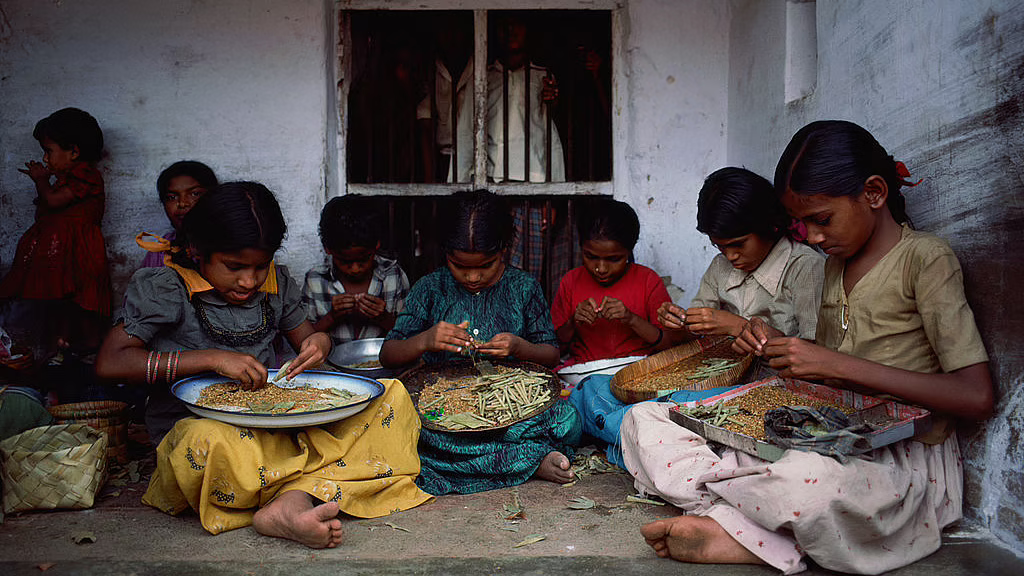

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_excel('sample_data/Merge Entry_2009-10.xlsx',header = 1);df.head(1)

Sr. \nNo. Form No. CPS No  ...                Unnamed: 60  Unnamed: 61 Unnamed: 62
0         1     1/10  1/125  ...  Lack of interest in study          NaN         NaN

[1 rows x 63 columns]

In [ ]:
df.isnull().sum()

Sr. \nNo.                                 0
Form No.                                  0
CPS No                                    0
CPS \nName                                0
School code                               0
                                       ... 
Surveyor's Observations and Remarks      14
Unnamed: 59                            1535
Unnamed: 60                            1521
Unnamed: 61                            1536
Unnamed: 62                            1536
Length: 63, dtype: int64

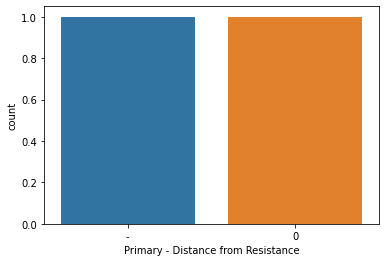

In [ ]:
_ = sns.countplot(x = df['Primary - Distance from Resistance'][df['Primary - Distance from Resistance'].notnull().value_counts()])

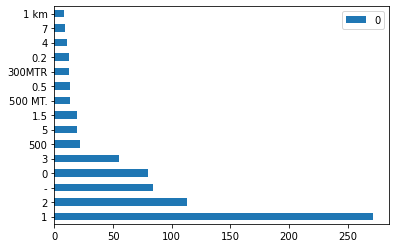

In [ ]:
_ = pd.DataFrame(df[df['Primary - Distance from Resistance'].notnull()]['Primary - Distance from Resistance'].value_counts().values[0:15],
             index=df[df['Primary - Distance from Resistance'].notnull()]['Primary - Distance from Resistance'].value_counts().index[0:15]).plot(kind = 'barh')

In [ ]:
df['Primary - Distance from Resistance'].unique()

array([nan, 1, 2, 7, '50 M', 17, 15, 8, 13, 5, '300MTR', '250MTR',
       '50MTR', '100MTR', '200MTR', '100KM', 1.5, 0.5, 3, 4, '100 mi.',
       '200 mi.', '300 mi.', 10, '500 m', '1 km', '200m', 0, '500m', 11,
       '1.5 KM', 0.8, 0.3, 1.2, '1KM', '0.100 M', 0.1, '100M', '500M',
       '300M', '7KM', '1 KM', '0.500 M', 0.4, 0.2, '1 M', '200M', '50M',
       '800M', 30, 200, 6, 400, '400 MTR', '300mtr', '400MTR', '500MTR',
       '3KM', 2.5, 110, 100, '500 MT.', 3.5, '200 MT.', 600, 500, '-',
       700, 50, 300, 12], dtype=object)

In [ ]:
dist = { 1:1, 2:2, 7:7, '50 M':.05, 17:17, 15:15, 8:8, 13:13, 5:5, '300MTR':.3, '250MTR':.25,
       '50MTR':.05, '100MTR':.1, '200MTR':.2, '100KM':.1, 1.5:1.5, 0.5:.5, 3:3, 4:4, '100 mi.':.1,
       '200 mi.':.2, '300 mi.':3, 10:10, '500 m':.5, '1 km':1, '200m':.2, 0:0, '500m':.5, 11:11,
       '1.5 KM':1.5, 0.8:.8, 0.3:.3, 1.2:1.2, '1KM':1, '0.100 M':.1, 0.1:.1, '100M':.1, '500M':.5,
       '300M':.3, '7KM':7, '1 KM':1, '0.500 M':.5, 0.4:.4, 0.2:.2, '1 M':1, '200M':.2, '50M':.05,
       '800M':.8, 30:30, 200:.200, 6:6, 400:.4, '400 MTR':.4, '300mtr':.3, '400MTR':.4, '500MTR':.5,
       '3KM':3, 2.5:2.5, 110:.110, 100:.100, '500 MT.':.5, 3.5:3.5, '200 MT.':.2, 600:.6, 500:.5, '-':np.nan,
       700:.7, 50:50, 300:.3, 12:12}

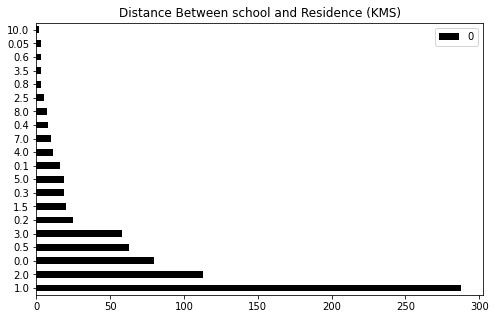

In [ ]:
#df['Primary - Distance from Resistance'].map(dist)

_ = pd.DataFrame(df[df['Primary - Distance from Resistance'].notnull()]['Primary - Distance from Resistance'].map(dist).value_counts().values[0:20],
             index=df[df['Primary - Distance from Resistance'].notnull()]['Primary - Distance from Resistance'].map(dist).value_counts().index[0:20]).plot(kind = 'barh',figsize = (8,5),color = 'black',title = 'Distance Between school and Residence (KMS)')

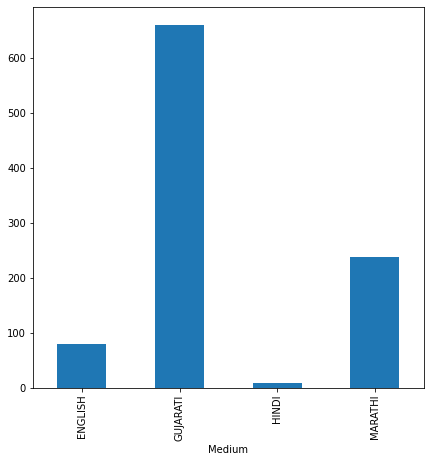

In [ ]:
_ = df.groupby(['Medium'])['Father\'s Monthly Income'].count().plot(kind = 'bar',figsize = (7,7))

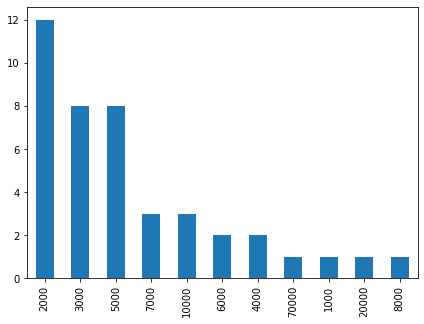

In [ ]:
plt.figure(figsize=(7,5))
_ = (df['Father\'s Monthly Income'][0:50]).value_counts().plot(kind = 'bar')

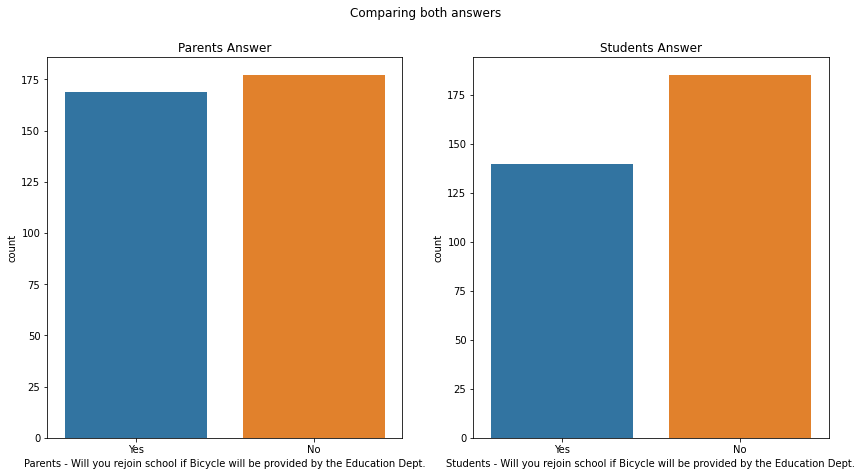

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.countplot(x = df['Parents - Will you rejoin school if Bicycle will be provided by the Education Dept.'],ax = ax[0])
ax[0].set_title('Parents Answer')
sns.countplot(x = df['Students - Will you rejoin school if Bicycle will be provided by the Education Dept.'],ax = ax[1])
ax[1].set_title('Students Answer')
fig.suptitle('Comparing both answers')
#display(fig)
plt.show()

In [ ]:
df['Status'].value_counts().sort_values()

HOUSE WORK\nDOING WORK                                                          1
CONTUING STUDY                                                                  1
\nCONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY\n      1
\nCONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY        1
CONTINUING STUDY \nCONTINUING STUDY\nCONTINUING SUDY\nCONTUINING STUDY          1
                                                                             ... 
DROPOUT                                                                        26
CONTINUING STUDY                                                               30
-                                                                              40
CONTINUING STUDY\nCONTINUING STUDY                                             45
CONTINUING STUDY                                                              100
Name: Status, Length: 240, dtype: int64

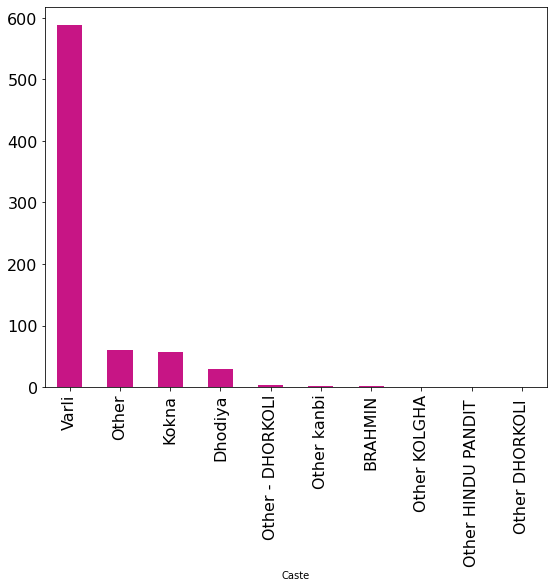

In [ ]:
_ = df.groupby(['Caste'])['Status'].count().sort_values(ascending = False).plot.bar(figsize = (9,7),color='mediumvioletred',fontsize=16)

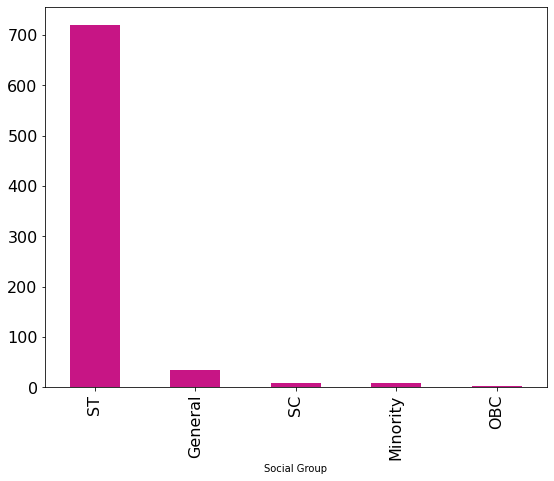

In [ ]:
_ = df.groupby(['Social Group'])['Status'].count().sort_values(ascending = False).plot.bar(figsize = (9,7),color='mediumvioletred',fontsize=16)

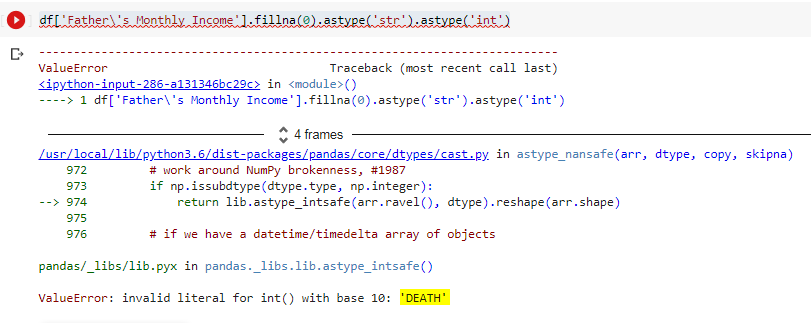

In [ ]:
df.loc[df['Father\'s Monthly Income'] == 'DEATH', ['Father\'s Monthly Income']] = 0

In [ ]:
df.loc[df['Father\'s Monthly Income'] == '-', ['Father\'s Monthly Income']] = 0

In [ ]:
df['Father\'s Monthly Income'].fillna(0).astype(str).astype(int)

0        4000
1        3000
2        2000
3        3000
4        3000
        ...  
1532        0
1533     7000
1534        0
1535      500
1536    10000
Name: Father's Monthly Income, Length: 1537, dtype: int64

In [ ]:
df['Father\'s Monthly Income'] = df['Father\'s Monthly Income'].fillna(0).astype(str).astype(int)

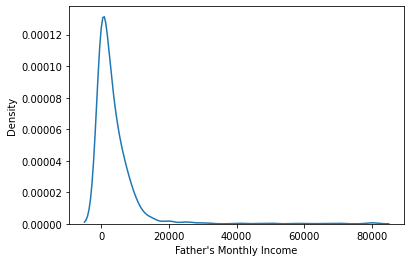

In [ ]:
_ = sns.kdeplot((df['Father\'s Monthly Income']))

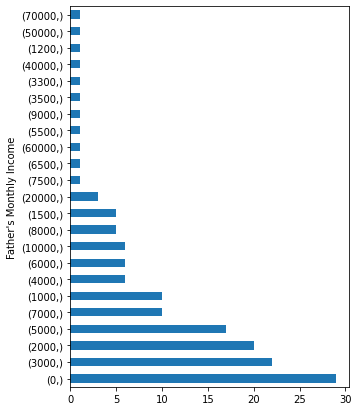

In [ ]:
df[['Father\'s Monthly Income']][0:150].value_counts().plot(kind = 'barh',figsize = (5,7))

In [ ]:
df['Father\'s Educational Level'].value_counts()

Illeterate     730
Primary        307
Up.Pri         101
Matriculate     91
-               10
Graduate         9
Name: Father's Educational Level, dtype: int64

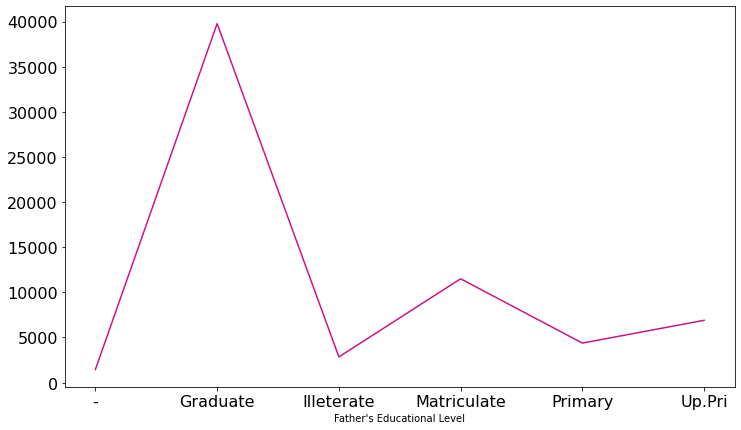

In [ ]:
_ = df.groupby('Father\'s Educational Level')['Father\'s Monthly Income'].mean().sort_index().plot(figsize = (12,7),color='mediumvioletred',fontsize = 16)

A very interesting pattern is noticed below

In [ ]:
df['Father\'s Educational Level'].unique()

array(['Illeterate', 'Primary', 'Up.Pri', 'Matriculate', 'Graduate', nan,
       '-'], dtype=object)

In [ ]:
df[df['Father\'s Educational Level']=='Illeterate']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                                          50
-                                                                         37
CONTINUING STUDY\nCONTINUING STUDY                                        25
DROPOUT\nDROPOUT\nDROPOUT                                                 15
DROPOUT                                                                   14
CONTINUING                                                                14
DROPOUT\nDROPOUT                                                          11
CONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY                      11
CONTINUING\nCONTINUING                                                     8
DROP OUT\nDROP OUT                                                         7
1) STUDYING                                                                7
DROPOUT\nCONTINUING STUDY                                                  7
1) STUDYING\n2) STUDYING                                                   6

In [ ]:
df[df['Father\'s Educational Level']=='Primary']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                                            28
CONTINUING STUDY                                                            14
CONTINUING\nCONTINUING                                                      12
DROPOUT\nDROPOUT                                                             9
CONTINUING STUDY\nCONTINUING STUDY                                           9
DROPOUT                                                                      6
CONTINUING                                                                   5
STUDYING                                                                     5
CONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY                         4
DROP-OUT                                                                     4
DROP OUT\nDROP OUT                                                           4
STUDYING                                                                     3
CONTINUING STUDY \nCONTINUING STUDY                 

In [ ]:
df[df['Father\'s Educational Level']=='Up.Pri']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                                                    8
CONTINUING STUDY\nCONTINUING STUDY                                                  4
CONTINUING STUDY                                                                    4
STUDYING                                                                            4
DROPOUT                                                                             2
CONTINUING\nCONTINUING                                                              2
DROPOUT                                                                             2
DROPOUT\nDROPOUT\nDROPOUT                                                           2
DROPOUT\nCONTUNUING\nCONTUNUING                                                     1
1) DROPOUT\n2) DROPOUT\n3) STUDYING\n4) STUDYING\n5) STUDYING                       1
CONTINUING STUDY\nCONTINUING STUDY\nCONTINUING STUDY                                1
CONTINUING\nCONTINUING\nCONTINUING                    

In [ ]:
df[df['Father\'s Educational Level']=='Matriculate']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING STUDY                                        9
CONTINUING STUDY                                        8
CONTINUING STUDY\nCONTINUING STUDY                      3
DROPOUT                                                 2
STUDYING                                                2
1) STUDYING\n2) STUDYING\n3) STUDYING                   2
MARRIED \nCONTINUING STUDY                              1
CONTINUING\nCONTINUING                                  1
DROPOUT\nDROPOUT\nDROPOUT                               1
DROUPOUT, DROUPOUT                                      1
DROPOUT\nCONTINUING                                     1
EDUCATIO COMPLETED\nSERVICE                             1
CONTINUNG STUDY                                         1
DROPOUT\nDROPOUT\nDROPOUT\nSTUDYING                     1
MARRIED                                                 1
STUDYING                                                1
_\n_\n_\nCONTINUING                                     1
M.S.UNI.BARODA

In [ ]:
df[df['Father\'s Educational Level']=='Graduate']['Status'].value_counts().sort_values(ascending = False)[0:50]

CONTINUING\nCONTINUING                  2
CONTINUING STUDY \nCONTINUING STUDY     1
Name: Status, dtype: int64

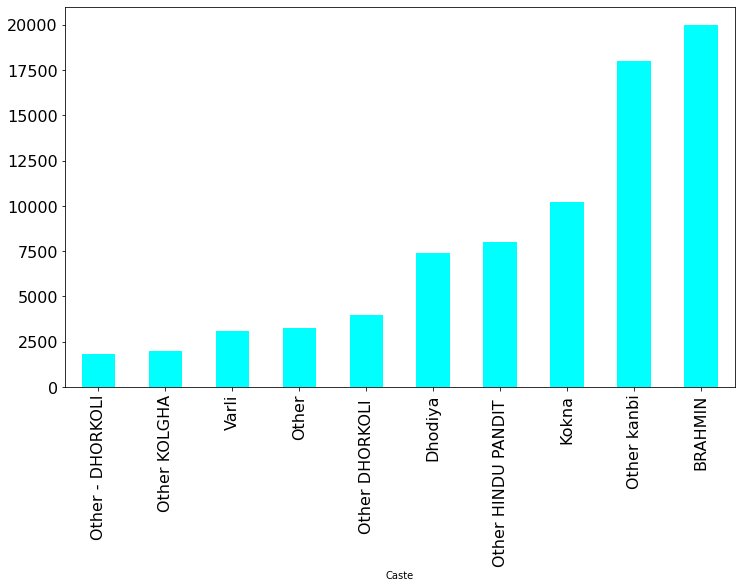

In [ ]:
_ = df.groupby(['Caste'])['Father\'s Monthly Income'].mean().sort_values().plot.bar(figsize = (12,7),fontsize = 16,color = 'cyan')

In [ ]:
df.columns

Index(['Sr. \nNo.', 'Form No.', 'CPS No', 'CPS \nName', 'School code',
       'Name of School', 'Village Name', 'Medium', 'Full Name', 'Gender',
       'DOB\n(DD/MM/YYYY)', 'Mobile No', 'Full address', 'Father's Name',
       'Mother's name', 'Religion', 'Social Group', 'Caste',
       'Father's Educational Level', 'Mother's Educational Level',
       'Father's Occupation', 'Mother's Occupation', 'Father's Monthly Income',
       'Mother's Monthly Income', 'Dropout Std', 'Dropout Year',
       'Dropout School', 'Primary - Distance from Resistance',
       'Upper Primary - Distance from Resistance',
       'Secondary - Distance from Resistance', 'Mode of Transport', 'Time',
       'Parents - Why did your children have stoped going to schoool',
       'Students - Why did your children have stoped going to schoool',
       'Subjects you like most', 'Subject difficult for you',
       'Parents - Do you want to send your child/go back to schools',
       'Students - Do you want to send your

In [ ]:
df['What is required for you to rejoin the school'].fillna('').unique()

array(['', "DON'T WANT TO GO TO SCHOOL", "DON'T WANT TO STUDY",
       'IF PASSED 10th THEN GO TO SCHOOL', 'STUDYING IN 12th',
       'BICYCLE,UNIFORM, MOBILE', 'BICYCLE ',
       "NOTHING, DON'T WANT TO GO TO SCHOOL", "DON'T WANT T O STUDY",
       'NOTHING', 'NOT INTERESTED IN STUDY', 'LACK OF INTERSEST IN STUDY',
       'VEHICLE CONVENIENCE', 'IF THERE IS A VEHICLE FACILITY',
       'NOT JOIN THE SCHOOL', 'IF GET ALL DOCUMENT WILL STUDY',
       'REFUSES TO GO TO SCHOOL. ADMISSION GIVEN AT GHSS KHANVEL',
       'REFUSES TO GO TO SCHOOL.',
       "DON'T WANT TO GO TO SCHOOL. NOT  GIVE AN ADMISSION", 'NO',
       'FINANCIAL SUPPORT, TRANSPORATION & HOSTEL FACILITY IF PROVIDE.',
       'wiling rejoin school the financial assistance and transportation facility required gaidance from techer to pass the subject',
       'BECAUSE OF MIGRATED', 'HE IS ALREADY STUDYING',
       'IF I AM GIVEN A BICYCLE, I WANT TO GO TO SCHOOL.', 'NO REQUIRED',
       'NOT JUST GOING TO SCHOOL.',
       'GOOD

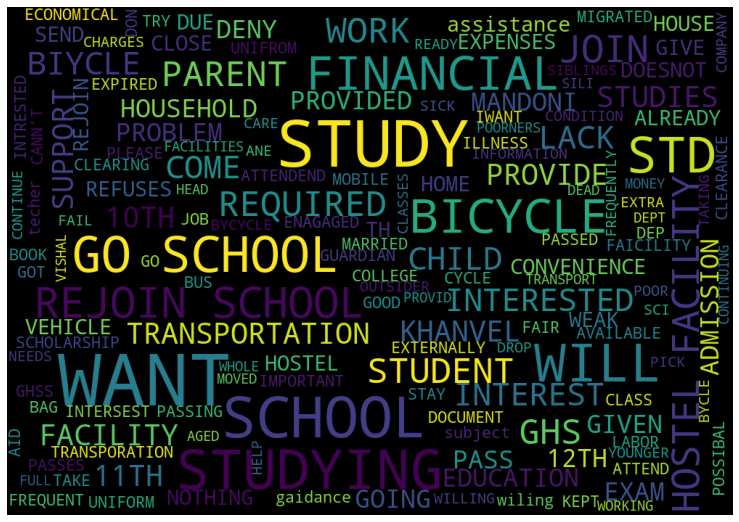

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['What is required for you to rejoin the school'].fillna('').unique()]) 
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(all_words)
plt.figure(figsize=(13, 10))
plt.imshow(wordcloud,)# interpolation="bilinear")
plt.axis('off')
plt.show()

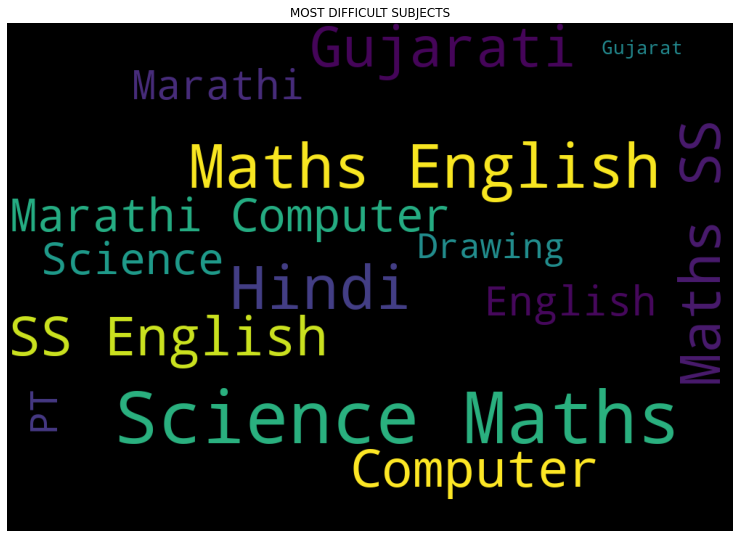

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Subject difficult for you'].fillna('').unique()]) 
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(all_words)
plt.figure(figsize=(13, 10))
plt.imshow(wordcloud,)# interpolation="bilinear")
plt.axis('off')
plt.title('MOST DIFFICULT SUBJECTS',)
plt.show()

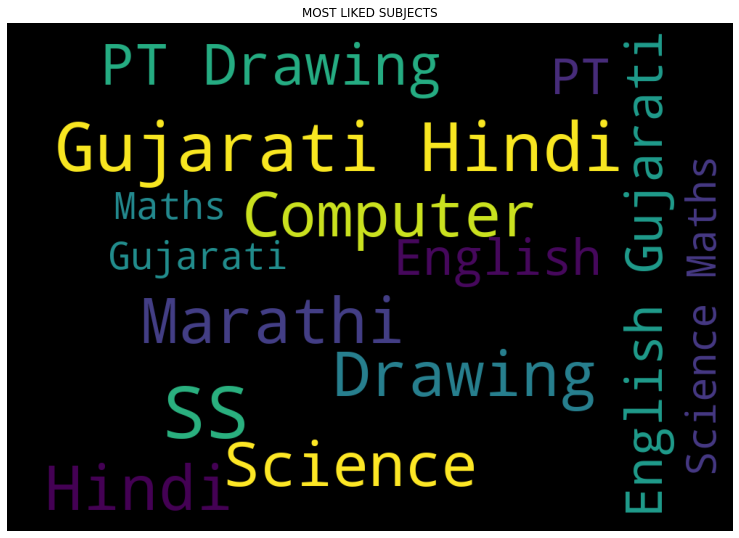

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Subjects you like most'].fillna('').unique()]) 
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(all_words)
plt.figure(figsize=(13, 10))
plt.imshow(wordcloud,)# interpolation="bilinear")
plt.axis('off')
plt.title('MOST LIKED SUBJECTS',)
plt.show()

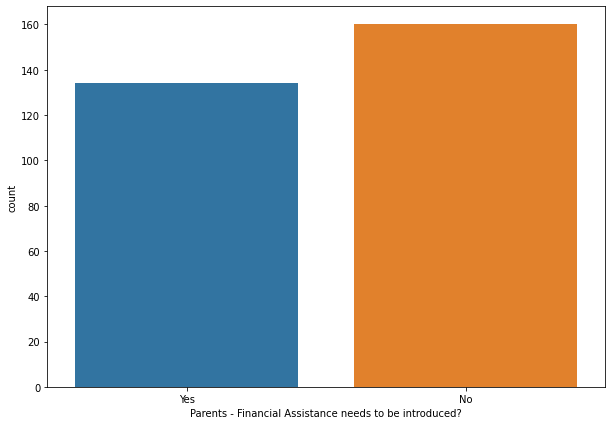

In [ ]:
plt.figure(figsize=(10,7))
_ = sns.countplot(x=df[df['Parents - Financial Assistance needs to be introduced?'].notnull()]['Parents - Financial Assistance needs to be introduced?'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


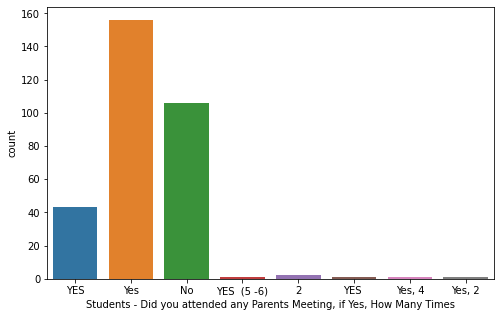

In [ ]:
_ = plt.figure(figsize=(8,5))
_ = sns.countplot(df[df['Students - Did you attended any Parents Meeting, if Yes, How Many Times'].notnull()]['Students - Did you attended any Parents Meeting, if Yes, How Many Times'])

In [ ]:
df['Father\'s Educational Level'].unique()

array(['Illeterate', 'Primary', 'Up.Pri', 'Matriculate', 'Graduate', nan,
       '-'], dtype=object)

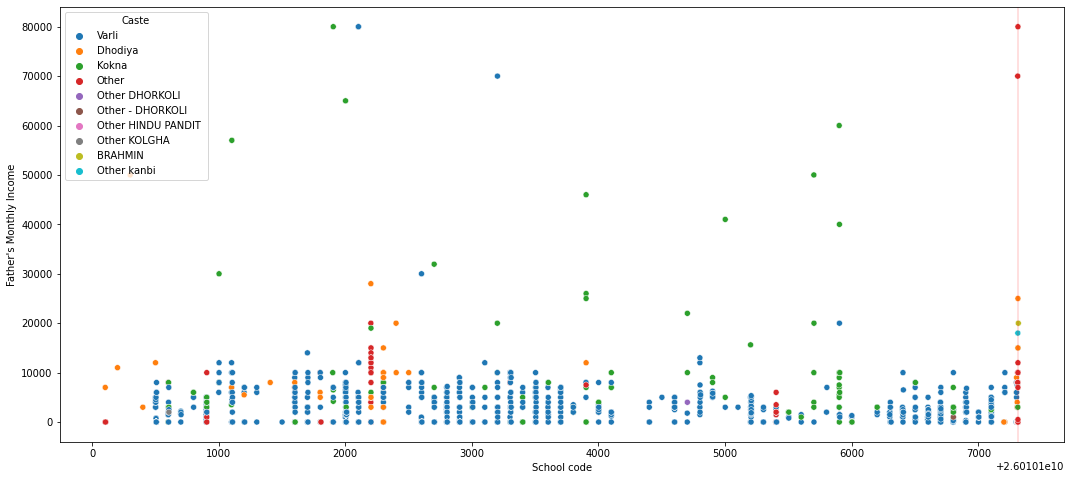

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(x = 'School code', y = "Father's Monthly Income",data = df,hue = 'Caste')
plt.axvline(x = 26010107311,linewidth=.25, color='r')


In [ ]:
sc_vals = df['School code'].value_counts().index.values

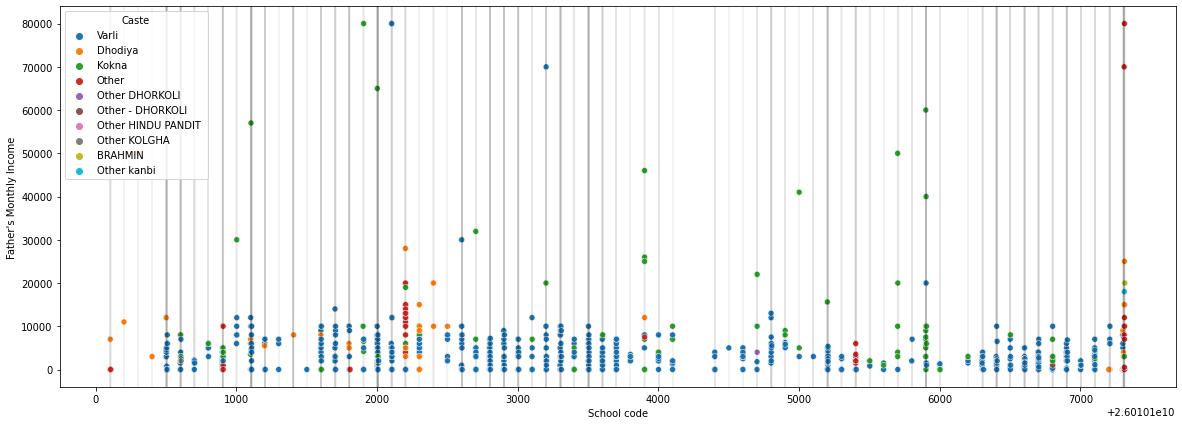

In [ ]:
plt.figure(figsize=(20,7))
sns.scatterplot(x = 'School code', y = "Father's Monthly Income",data = df,hue = 'Caste')
for i in sc_vals:
  plt.axvline(x = i,linewidth=.1,c = 'black')

  

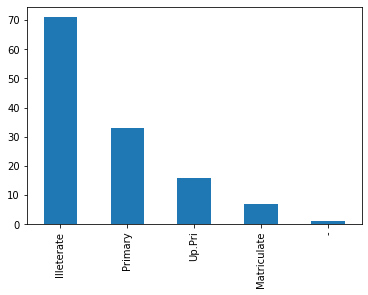

In [ ]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='Yes']['Father\'s Educational Level'].value_counts().plot.bar()

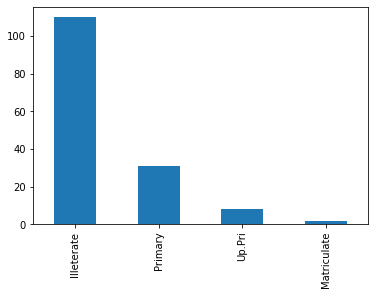

In [ ]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='No']['Father\'s Educational Level'].value_counts().plot.bar()

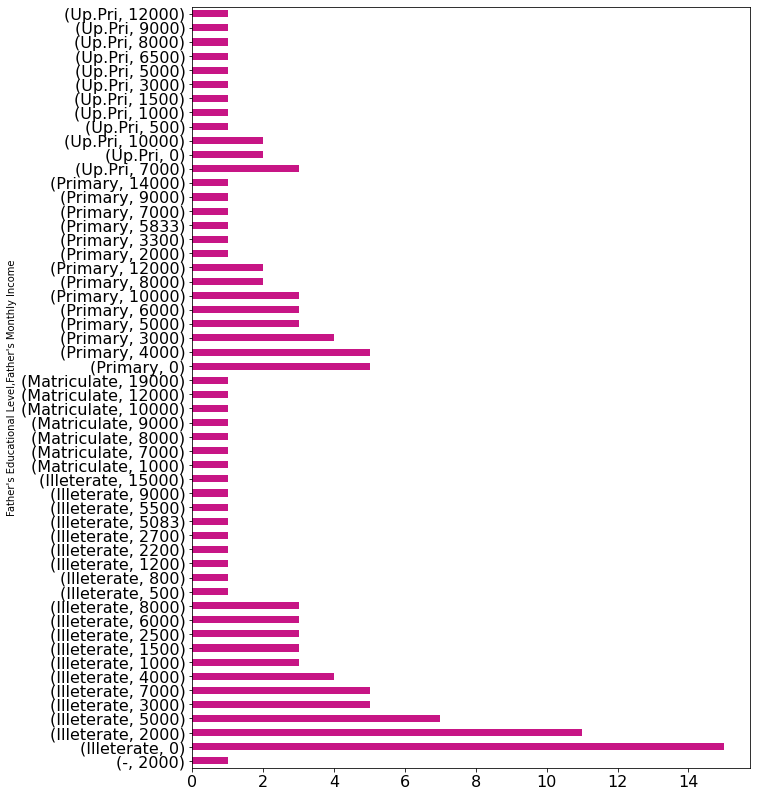

In [ ]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='Yes'].groupby(['Father\'s Educational Level',])['Father\'s Monthly Income'].value_counts().plot(kind = 'barh',figsize = (10,14),color='mediumvioletred',fontsize=16)

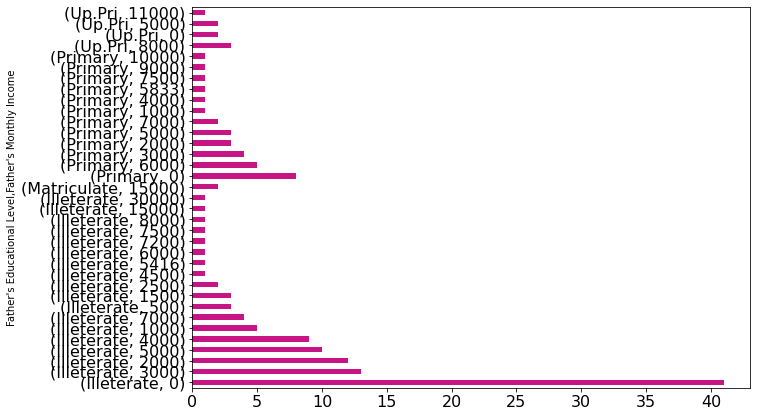

In [ ]:
_ = df[df['Parents - Financial Assistance needs to be introduced?']=='No'].groupby(['Father\'s Educational Level',])['Father\'s Monthly Income'].value_counts().plot(kind = 'barh',figsize = (10,7),color='mediumvioletred',fontsize=16)

In [ ]:
list_of_tweets = query_tweets("#rural_education",None, begindate=dt.date(2009, 5, 7),enddate=dt.date(2010,5,7), poolsize=9, lang='');list_of_tweets

NameError: ignored

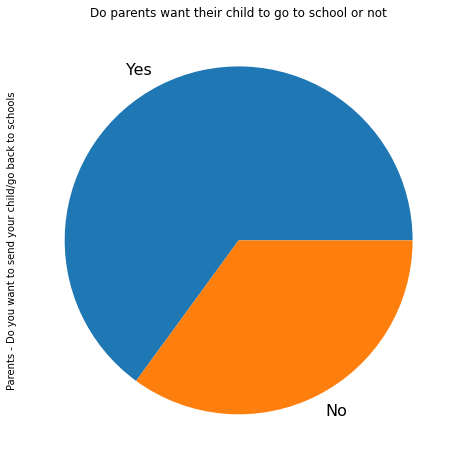

In [ ]:
_ =df['Parents - Do you want to send your child/go back to schools'].value_counts().plot(kind = 'pie',figsize = (12,8),fontsize = 16)
_ = plt.title('Do parents want their child to go to school or not')

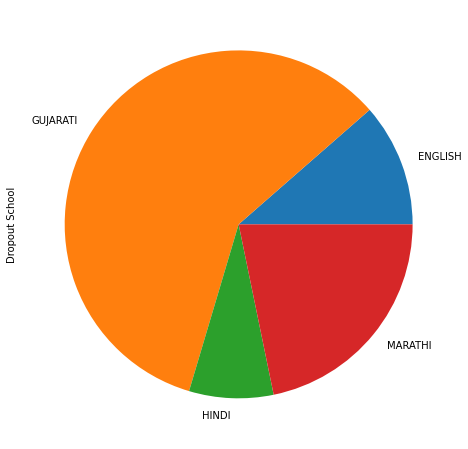

In [ ]:
_ = plt.figure(figsize=(12,8))
_ = df.groupby(['Medium'])['Dropout School'].count().plot(kind = 'pie')

In [ ]:
df[df['Medium']=='GUJARATI']["Parents - Why did your children have stoped going to schoool"].iloc[1]

'TRY TO SEND HIM TO GO TO SCHOOL HE GAVE THEM THREATENS TO DIE. '

In [ ]:
data = pd.DataFrame()
data['parent_why_child_stopped'] = df['Parents - Why did your children have stoped going to schoool']

In [ ]:
parents =  data[data['parent_why_child_stopped'].notnull()].copy()

# Some ML

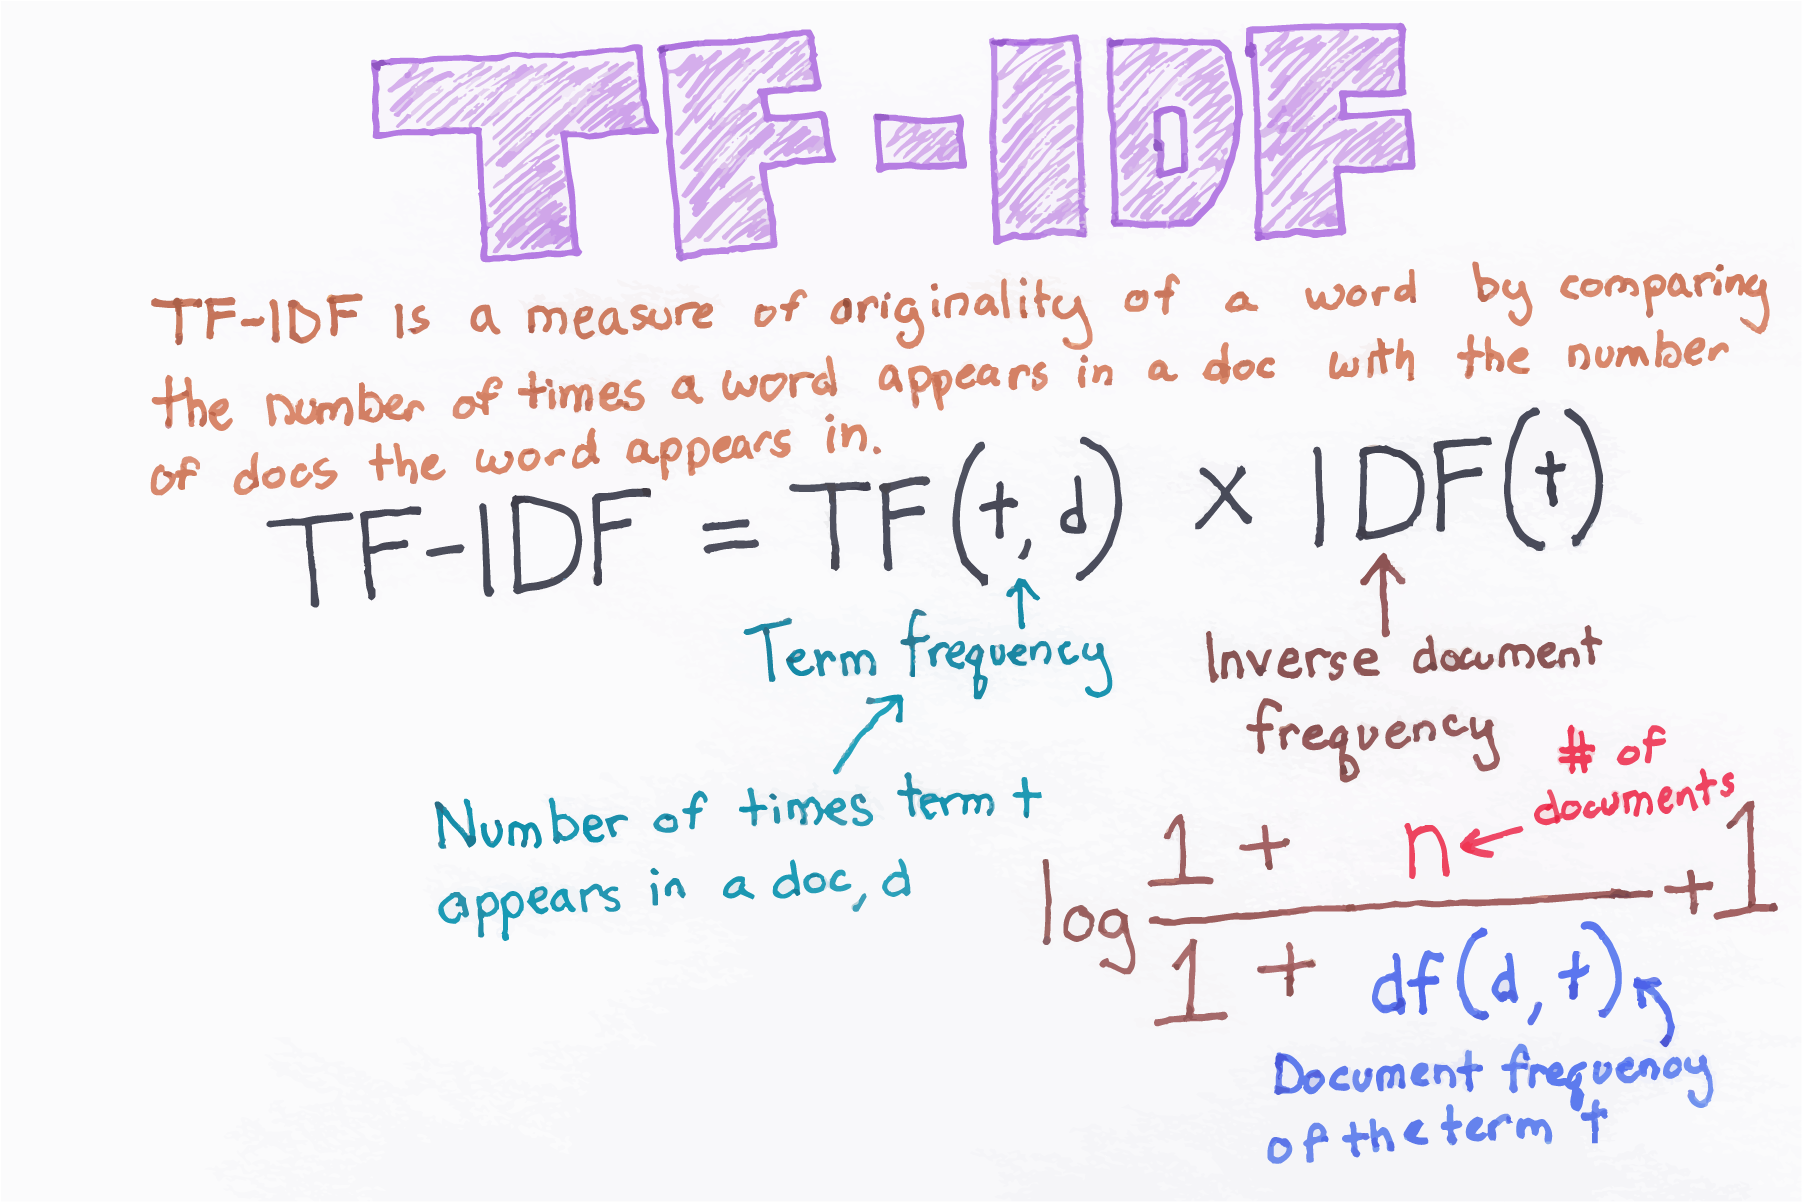

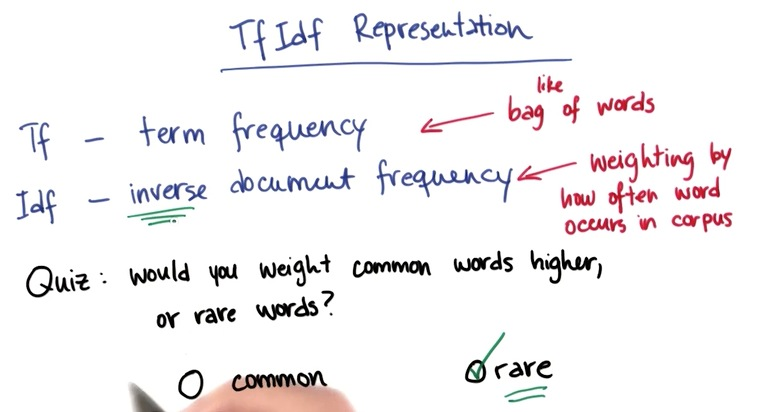

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

x_parent = tf.fit_transform(parents.parent_why_child_stopped)

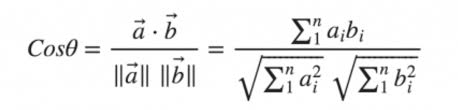

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(x_parent);len(cosine_similarity(x_parent))

first = cosine_similarity(x_parent)[0] 

In [ ]:
parents.iloc[0].values

array(["SEND HIM BUT DON'T WANT TO GO TO SCHOOL"], dtype=object)

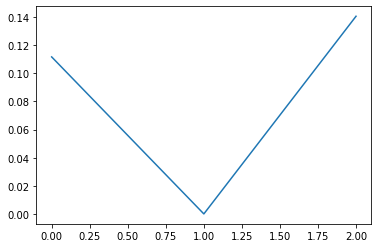

In [ ]:
plt.plot(first[700:1000:100]) 

In [ ]:
parents.iloc[0]['parent_why_child_stopped']

"SEND HIM BUT DON'T WANT TO GO TO SCHOOL"

In [ ]:
set(parents[700:1000:100]['parent_why_child_stopped'])

{'GOING TO COMPANY',
 'HE HAS FAIL IN STD. 10TH SO HE IS NOT GOING TO SCHOOL',
 'Lack of interest in study, Engaged in Household Work'}

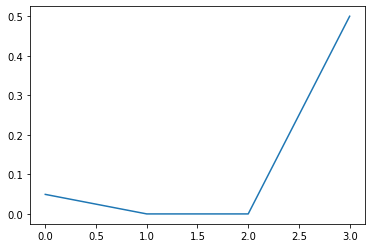

In [ ]:
plt.plot(first[950:1150:50])

In [ ]:
parents.iloc[0]['parent_why_child_stopped']

"SEND HIM BUT DON'T WANT TO GO TO SCHOOL"

In [ ]:
set(parents[1050:1150:50]['parent_why_child_stopped'])

{'PARENTS  SENDING HIM SCHOOL BUT HE DOES  NOT WANT  TO SCHOOL.',
 'WE DO NOT TEACH TOO MUCH IN OUR CAST'}

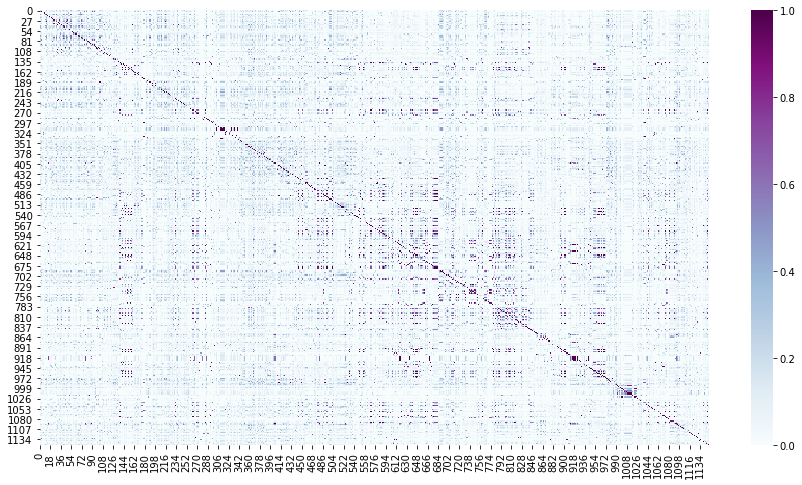

In [ ]:
_  = plt.figure(figsize = (15,8))
_ = sns.heatmap(cosine_similarity(x_parent),cmap='BuPu')

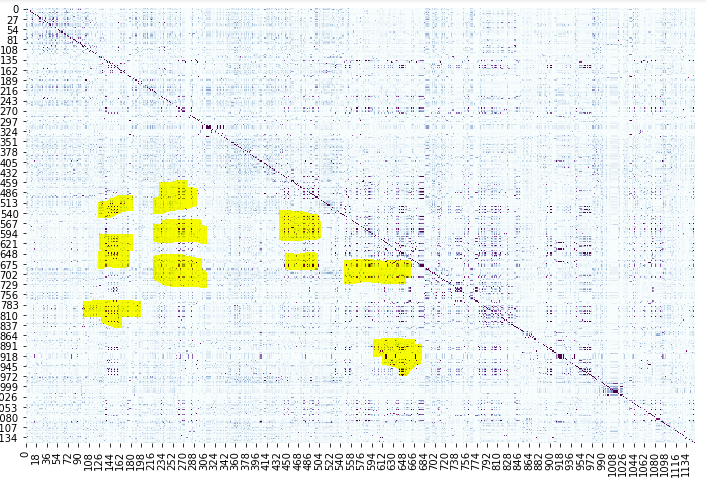

In [ ]:
from sklearn.manifold import TSNE
#to get the first col of the matrix
def column(matrix, i):
    return [row[i] for row in matrix]

def show_tsne(x):
  tsne = TSNE(perplexity=100)
  twod_data = tsne.fit_transform(cosine_similarity(x_parent))
  print('Below is the example of how our reduced matrix looks like')
  print(twod_data[0])
  print(type(twod_data))
  _ = plt.figure(figsize=(12,9))
  _ = plt.scatter(x = column(twod_data,0),y = column(twod_data,1),alpha=.3)
  return(_)

Below is the example of how our reduced matrix looks like
[ 15.180267 -13.192047]
<class 'numpy.ndarray'>


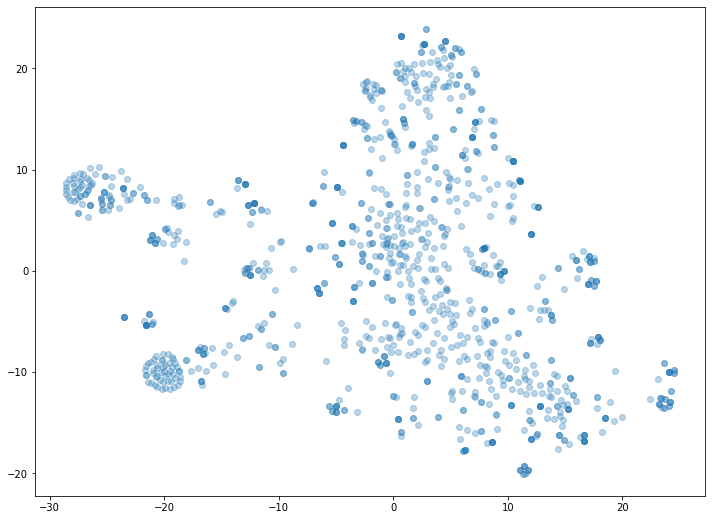

In [ ]:
show_tsne(cosine_similarity(x_parent))

In [ ]:
from sklearn.decomposition import PCA

#to get the first col of the matrix
def column(matrix, i):
    return [row[i] for row in matrix]

def show_pca(x):
  pca = PCA(n_components=2)

  twod_data = pca.fit_transform(cosine_similarity(x_parent))
  print('Below is the example of how our reduced matrix looks like')
  print(twod_data[0])
  print(type(twod_data))
  _ = plt.figure(figsize=(12,9))
  return(plt.scatter(x = column(twod_data,0),y = column(twod_data,1),alpha=.3))

Below is the example of how our reduced matrix looks like
[-2.67512643 -0.62904909]
<class 'numpy.ndarray'>


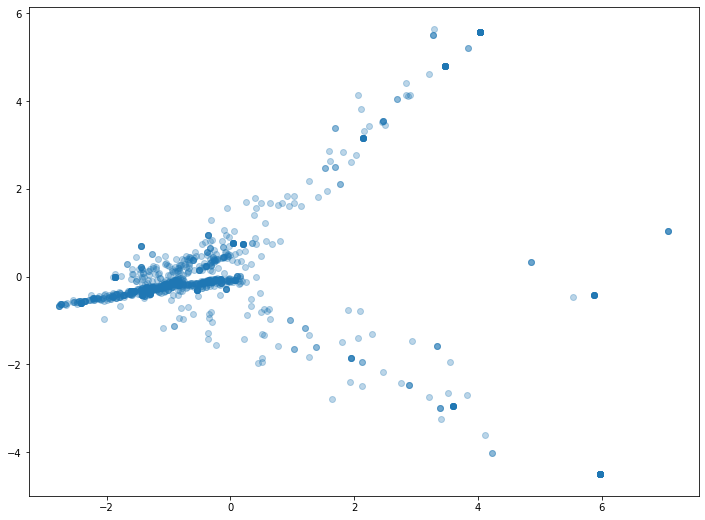

In [ ]:
show_pca(cosine_similarity(x_parent))

# A little more Information Gain

In [ ]:
for i in range(0,5):
  print(df['Surveyor\'s Observations and Remarks'].loc[i])

THE CHILD HAS NOT GIVEN ANY REASON TO GO TO SCHOOL,
Age : 17 yrs.
EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,
Age : 16 yrs.
DON'T WANT TO GO TO SCHOOL. SHE IS MARRIED, ,
Age : 17 yrs.
PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY, Age : 16 yrs.
NOW SHE IS MARRIED. TAKING CARE OF CHILD AT HER HOME. SO CAN'T GO TO SCHOOL,
Age : 17 yrs.


In [ ]:
a = df[df['Surveyor\'s Observations and Remarks'].notnull()]['Surveyor\'s Observations and Remarks']
for i in range(16,26):
  print('--------------------'+str(i)+'YEAR OLD--------------------------')
  print(a[a.str.contains("Age : "+str(i)+" yrs.")])


--------------------16YEAR OLD--------------------------
1       EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE TH...
3       PARENTS SEND HER BUT SHE HAs NO INTEREST IN GR...
5       SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge ...
7       SHE IS NOT INTERESTED IN STUDY & GOING TO COMP...
8       FAILED 10th AT HSS SURANGI IN STD. 10th IN 201...
                              ...                        
260     DON'T LIKE TO STUDY. NOW AT HOME. 8th PASS BUT...
261     8th PASSED. BUT THE FINANACIAL CONDITION IS NO...
262     STD. 10th FAIL. WANT TO STUDY. FATHER IS NO MO...
263     HER MOTHER & FATHER HAVE DIVORCED. CURRETLY ST...
1304    FAMILY MIGRATED TO RAJASTHAN FROM SILVASSA [TH...
Name: Surveyor's Observations and Remarks, Length: 93, dtype: object
--------------------17YEAR OLD--------------------------
0      THE CHILD HAS NOT GIVEN ANY REASON TO GO TO SC...
2      DON'T WANT TO GO TO SCHOOL. SHE IS MARRIED, ,\...
4      NOW SHE IS MARRIED. TAKING CARE OF CHILD AT HE...
16     P

In [ ]:
import spacy
nlp = spacy.load('en') 
from sklearn.manifold import TSNE
tsne = TSNE()
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  #tsne.fit_transform(np.array(vec).reshape(-1,1))
  return vec

In [ ]:
ts_df = pd.DataFrame()

In [ ]:
ts_df['vec'] = a.apply(lambda x: get_vec(x))

In [ ]:
inp1 = ts_df.to_numpy()

In [ ]:
inp2 = inp1.reshape(-1,1)

In [ ]:
inp3 = np.concatenate(np.concatenate(inp1,axis = 0),axis = 0).reshape(-1,96) 

In [ ]:
inp3.shape

(1523, 96)

In [ ]:
two_d = tsne.fit_transform(pd.DataFrame(inp3))

In [ ]:
two_df = pd.DataFrame(two_d);two_df.head()

0          1
0 -18.590256  11.979022
1 -13.469396  12.988874
2 -20.578035   8.520591
3 -11.557542   0.821201
4 -16.540173   8.786939

In [ ]:
two_df.columns = ['x','y']

In [ ]:
two_df.shape

(1523, 2)

In [ ]:
df[df['Caste'].notnull()]['Caste']

0         Varli
1         Varli
2         Varli
3       Dhodiya
4         Varli
         ...   
1485      Other
1531      Other
1533      Other
1535      Other
1536      Other
Name: Caste, Length: 1309, dtype: object

In [ ]:
two_df_trun = two_df[0:1309].copy()

In [ ]:
two_df_trun['caste'] = df[df['Caste'].notnull()]['Caste']

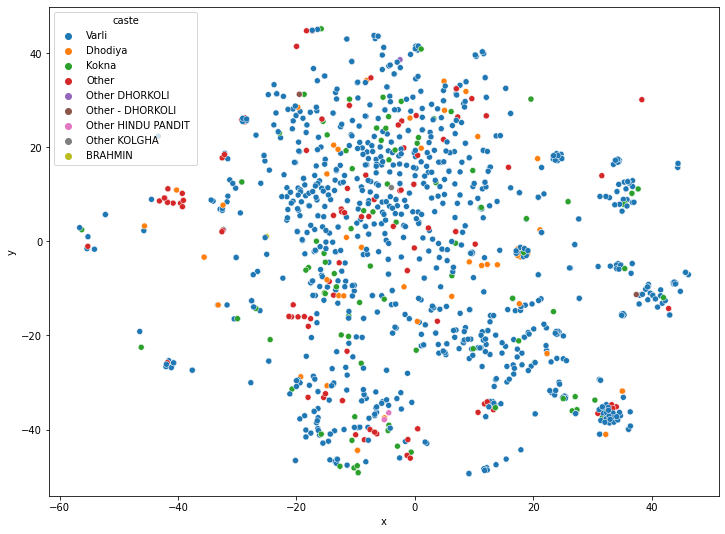

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = 'x',y = 'y',data = two_df_trun,hue = 'caste')

In [ ]:
main_df = df[df['Caste'].notnull() & df['Surveyor\'s Observations and Remarks'].notnull()][['Caste','Surveyor\'s Observations and Remarks']]

In [ ]:
ts_df = pd.DataFrame()
ts_df['vec'] = a.apply(lambda x: get_vec(x))
inp1 = ts_df.to_numpy()
inp2 = inp1.reshape(-1,1)
inp3 = np.concatenate(np.concatenate(inp1,axis = 0),axis = 0).reshape(-1,96)
two_d = tsne.fit_transform(pd.DataFrame(inp3))
two_df = pd.DataFrame(two_d);two_df.head()
two_df.columns = ['x','y']

In [ ]:
 vec = np.array(main_df['Surveyor\'s Observations and Remarks'].apply(lambda x: get_vec(x)))

In [ ]:
vec1 = vec.reshape(-1,1)

In [ ]:
vec2 = np.concatenate(np.concatenate(vec1,axis = 0),axis = 0).reshape(-1,96)

In [ ]:
vec3 = tsne.fit_transform(vec2)

In [ ]:
final_df = pd.DataFrame(vec3,columns=['x','y'])

In [ ]:
final_df['caste'] = main_df['Caste']

In [ ]:
final_df

x          y    caste
0      7.836060 -18.573389    Varli
1      9.746861 -13.247932    Varli
2      3.726050 -20.026266    Varli
3      3.498580  -5.064256  Dhodiya
4      5.022299 -15.904922    Varli
...         ...        ...      ...
1293 -20.587076  16.455112    Varli
1294 -12.117970   0.438402    Varli
1295 -12.024379   0.581714    Varli
1296 -10.084111  20.993418    Varli
1297 -12.019490   0.457884    Kokna

[1298 rows x 3 columns]

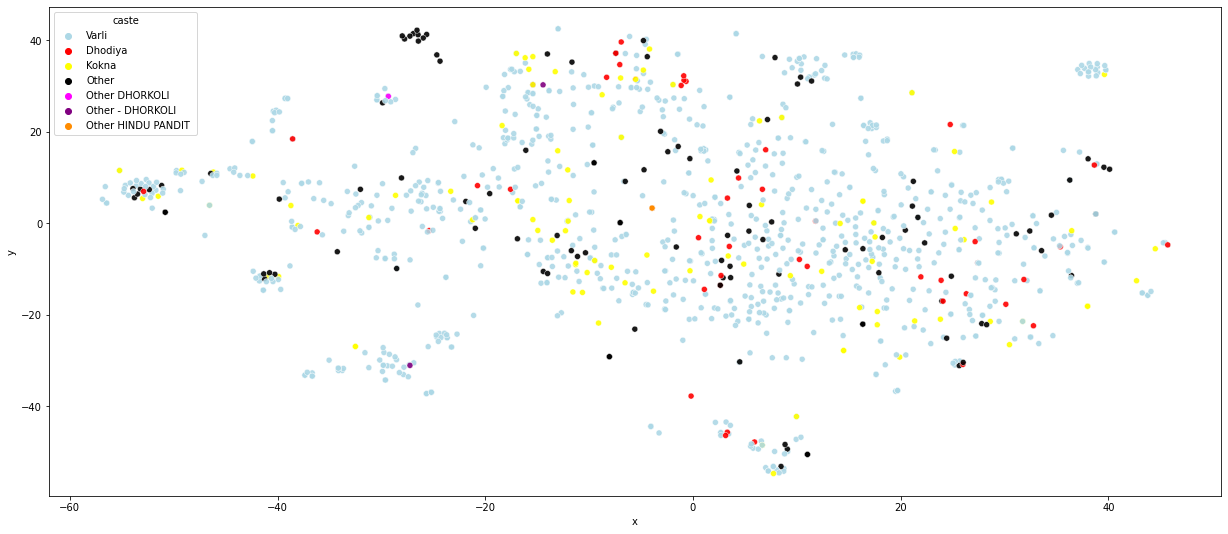

In [ ]:
_ = plt.figure(figsize=(21,9))
_ = sns.scatterplot(x = 'x',y = 'y',data = final_df,hue = 'caste',palette = ['lightblue','red','yellow','black','magenta','purple','darkorange'],alpha = .9)

**As I was explaining this notebook, 1,907,223,370 websites are active on the internet and 2,722,460 emails are being sent per second**

## Data Cleaning For Summarising Reasons

In [ ]:
r = []
for i in range(16,26):
  r.append(a[a.str.contains("Age : "+str(i)+" yrs.")])


In [ ]:
s = 'abc12321cba'

print(s.replace('a', ''))

In [ ]:
s = 'EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,\nAge : 16 yrs.'

print(s.replace(',\nAge : 16 yrs.',''))

EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE


In [ ]:
np.array(r[0]).reshape(-1,93)[0][0]

In [ ]:
clean_l = []
for i in range(0,93):
  s = str(np.array(r[0]).reshape(-1,93)[0][i])
  clean_l.append(s.replace(', Age : 16 yrs.',''))

In [ ]:
clean_l

['EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,\nAge : 16 yrs.',
 'PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY',
 "SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge : 16 yrs.",
 'SHE IS NOT INTERESTED IN STUDY & GOING TO COMPANY,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs.',
 'NOT INTERSTED IN STUDY SO NOT STUDY FURTHER,\nAge : 16 yrs.',
 '10th FAIL. GIVEN RE-EXAM OF 2 SUBJECTS,\nAge : 16 yrs.',
 'FAILED IN 10th. WILL TRY TO GIVE RE-EXAM. (16 YRS.), ,\nAge : 16 yrs.',
 'FAILED IN 10th. WILL TRY TO GIVE RE-EXAM,\nAge : 16 yrs.',
 "STUDIED UP TO 8th. LOTS OF TROUBLE IN TEACH & READ SO DON'T WANT TO GO TO SCHOOL",
 'AFTER 9th PASSED SHE DID NOT GO TO SCHOOL. CURRENTLY GO IN TO COMPANY SO NOT WANT TO STUDY',
 "FAR DISTANCE BETWEEN HOUSE & SCHOOL, HOUSEWORK AT HOME SO PARENTS NOT SEND HIM, DON'T WANT TO SEND IN HOSTEL. IF P

In [ ]:
for i in range(0,1):
  s = str(np.array(r[0]).reshape(-1,93)[0][i])
  clean_l.append(s.replace(',\nAge : 16 yrs.','',))

In [ ]:
clean_l

['EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,\nAge : 16 yrs.',
 'PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY',
 "SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge : 16 yrs.",
 'SHE IS NOT INTERESTED IN STUDY & GOING TO COMPANY,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs.',
 'NOT INTERSTED IN STUDY SO NOT STUDY FURTHER,\nAge : 16 yrs.',
 '10th FAIL. GIVEN RE-EXAM OF 2 SUBJECTS,\nAge : 16 yrs.',
 'FAILED IN 10th. WILL TRY TO GIVE RE-EXAM. (16 YRS.), ,\nAge : 16 yrs.',
 'FAILED IN 10th. WILL TRY TO GIVE RE-EXAM,\nAge : 16 yrs.',
 "STUDIED UP TO 8th. LOTS OF TROUBLE IN TEACH & READ SO DON'T WANT TO GO TO SCHOOL",
 'AFTER 9th PASSED SHE DID NOT GO TO SCHOOL. CURRENTLY GO IN TO COMPANY SO NOT WANT TO STUDY',
 "FAR DISTANCE BETWEEN HOUSE & SCHOOL, HOUSEWORK AT HOME SO PARENTS NOT SEND HIM, DON'T WANT TO SEND IN HOSTEL. IF P

In [ ]:
for i in range(2,9):
  s = str(np.array(r[0]).reshape(-1,93)[0][i])
  clean_l.append(s.replace(',\nAge : 16 yrs.','',))

In [ ]:
clean_l

['EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,\nAge : 16 yrs.',
 'PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY',
 "SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge : 16 yrs.",
 'SHE IS NOT INTERESTED IN STUDY & GOING TO COMPANY,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs.',
 'NOT INTERSTED IN STUDY SO NOT STUDY FURTHER,\nAge : 16 yrs.',
 '10th FAIL. GIVEN RE-EXAM OF 2 SUBJECTS,\nAge : 16 yrs.',
 'FAILED IN 10th. WILL TRY TO GIVE RE-EXAM. (16 YRS.), ,\nAge : 16 yrs.',
 'FAILED IN 10th. WILL TRY TO GIVE RE-EXAM,\nAge : 16 yrs.',
 "STUDIED UP TO 8th. LOTS OF TROUBLE IN TEACH & READ SO DON'T WANT TO GO TO SCHOOL",
 'AFTER 9th PASSED SHE DID NOT GO TO SCHOOL. CURRENTLY GO IN TO COMPANY SO NOT WANT TO STUDY',
 "FAR DISTANCE BETWEEN HOUSE & SCHOOL, HOUSEWORK AT HOME SO PARENTS NOT SEND HIM, DON'T WANT TO SEND IN HOSTEL. IF P

##Now let's try to summarise the above corpus

In [ ]:
import nltk

```we create a single string to get the summary```

In [ ]:
' '.join(map(str, clean_l)) 

In [ ]:
clean_s = ' '.join(map(str, clean_l)) 

In [ ]:
clean_s

"EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,\nAge : 16 yrs. PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge : 16 yrs. SHE IS NOT INTERESTED IN STUDY & GOING TO COMPANY,\nAge : 16 yrs. FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs. FAILED 10th AT HSS SURANGI IN STD. 10th IN 2019-2020,\nAge : 16 yrs. NOT INTERSTED IN STUDY SO NOT STUDY FURTHER,\nAge : 16 yrs. 10th FAIL. GIVEN RE-EXAM OF 2 SUBJECTS,\nAge : 16 yrs. FAILED IN 10th. WILL TRY TO GIVE RE-EXAM. (16 YRS.), ,\nAge : 16 yrs. FAILED IN 10th. WILL TRY TO GIVE RE-EXAM,\nAge : 16 yrs. STUDIED UP TO 8th. LOTS OF TROUBLE IN TEACH & READ SO DON'T WANT TO GO TO SCHOOL AFTER 9th PASSED SHE DID NOT GO TO SCHOOL. CURRENTLY GO IN TO COMPANY SO NOT WANT TO STUDY FAR DISTANCE BETWEEN HOUSE & SCHOOL, HOUSEWORK AT HOME SO PARENTS NOT SEND HIM, DON'T WANT TO SEND IN HOSTEL. IF PROVIDE A BICYCLE THEN HE WILL GO TO SCHOOL. ADMIS

In [ ]:
sentence_list  = nltk.sent_tokenize(clean_s) # conver the above para into sentences

In [ ]:
sentence_list[0:12]

['EVEN THE PARENTS DO NOT WANT TO SEND HIM.HE THREATENS TO DIE IF THEY SEND HIM BY FORCE,\nAge : 16 yrs.',
 "PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge : 16 yrs.",
 'SHE IS NOT INTERESTED IN STUDY & GOING TO COMPANY,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD.',
 '10th IN 2019-2020,\nAge : 16 yrs.',
 'FAILED 10th AT HSS SURANGI IN STD.',
 '10th IN 2019-2020,\nAge : 16 yrs.',
 'NOT INTERSTED IN STUDY SO NOT STUDY FURTHER,\nAge : 16 yrs.',
 '10th FAIL.',
 'GIVEN RE-EXAM OF 2 SUBJECTS,\nAge : 16 yrs.',
 'FAILED IN 10th.',
 'WILL TRY TO GIVE RE-EXAM.']

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for word in nltk.word_tokenize(clean_s):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [ ]:
word_frequencies

{'&': 24,
 "'S": 9,
 '(': 8,
 ')': 8,
 ',': 49,
 '-': 3,
 '.': 141,
 '1': 1,
 '10': 2,
 '10TH': 2,
 '10th': 36,
 '12th': 3,
 '16': 14,
 '2': 3,
 '2009-2010': 1,
 '2018-19': 1,
 '2019-20': 1,
 '2019-2020': 5,
 '3': 1,
 '5th': 1,
 '6th': 1,
 '8TH': 2,
 '8th': 6,
 '9': 2,
 '9th': 8,
 ':': 12,
 ';': 3,
 'A': 5,
 'ACTIVITY': 1,
 'ADMISSION': 6,
 'AFTER': 14,
 'AGAIN': 2,
 'AGE': 1,
 'ALL': 1,
 'ALSO': 2,
 'AN': 3,
 'AND': 12,
 'ANY': 1,
 'ANYMORE': 1,
 'ARE': 1,
 'AS': 10,
 'AT': 15,
 'ATMOSHPHERE': 1,
 'AWAY': 4,
 'Age': 12,
 'BACK': 2,
 'BARODA': 1,
 'BE': 3,
 'BECAUSE': 2,
 'BECOME': 1,
 'BEEN': 1,
 'BEING': 2,
 'BETTER': 2,
 'BETWEEN': 1,
 'BICYCLE': 1,
 'BOARD': 1,
 'BORED': 1,
 'BORI': 1,
 'BOYS': 1,
 'BRILIANT': 1,
 'BUSINESS': 1,
 'BUT': 8,
 'BY': 2,
 'C.': 1,
 'CA': 4,
 'CAN': 1,
 'CARE': 4,
 'CHIKHLIPADA': 1,
 'CHILD': 5,
 'CHILDREN': 2,
 'CLOSE': 2,
 'COME': 4,
 'COMPANY': 18,
 'CONDITION': 5,
 'CONTACT': 1,
 'COULD': 6,
 'CURRENTLY': 6,
 'CURRETLY': 1,
 'DEATH': 4,
 'DECLINING':

In [ ]:
maximum_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [ ]:
word_frequencies # shows the occurence in weighted frequence 

{'&': 0.1702127659574468,
 "'S": 0.06382978723404255,
 '(': 0.05673758865248227,
 ')': 0.05673758865248227,
 ',': 0.3475177304964539,
 '-': 0.02127659574468085,
 '.': 1.0,
 '1': 0.0070921985815602835,
 '10': 0.014184397163120567,
 '10TH': 0.014184397163120567,
 '10th': 0.2553191489361702,
 '12th': 0.02127659574468085,
 '16': 0.09929078014184398,
 '2': 0.02127659574468085,
 '2009-2010': 0.0070921985815602835,
 '2018-19': 0.0070921985815602835,
 '2019-20': 0.0070921985815602835,
 '2019-2020': 0.03546099290780142,
 '3': 0.0070921985815602835,
 '5th': 0.0070921985815602835,
 '6th': 0.0070921985815602835,
 '8TH': 0.014184397163120567,
 '8th': 0.0425531914893617,
 '9': 0.014184397163120567,
 '9th': 0.05673758865248227,
 ':': 0.0851063829787234,
 ';': 0.02127659574468085,
 'A': 0.03546099290780142,
 'ACTIVITY': 0.0070921985815602835,
 'ADMISSION': 0.0425531914893617,
 'AFTER': 0.09929078014184398,
 'AGAIN': 0.014184397163120567,
 'AGE': 0.0070921985815602835,
 'ALL': 0.0070921985815602835,
 '

In [ ]:
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30: 
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [ ]:
sentence_scores

{'(16 YRS.': 2.4822695035460995,
 '(GUJARAT)NOW STUDYING IN STD.': 1.1134751773049645,
 '),': 0.4042553191489362,
 '), ,\nAge : 16 yrs.': 2.0212765957446805,
 '10 EXAMINATION WAS GIVEN IN WHICH THE RESULT IS FAILED.': 1.0141843971631206,
 '10 SHE WAS SYUDYING IN SURANGI, BUT AFTER FAILING IN THE FIRST EXAMINATION, SHE STOPPED GOING TO SCHOOL.': 1.7092198581560285,
 '10th & IS NO LONGER INTERESTED IN STUDYING DESPITE TAKING THE EXAM TWICE IN STD.': 1.425531914893617,
 '10th EXAM & IS NOW PREPARING FOR THE EXAM AT HOME & AGAIN THERE IS A STD.': 1.5957446808510638,
 '10th EXAM TAKER DID NOT TAKE BOARD EXAM AFTER STUDYING IN STD.': 1.2553191489361701,
 '10th FAIL.': 2.5106382978723403,
 '10th FORM, THEN THE PERSON WHO FILLED THE FORM WANTS TO RETAKE THE STD.10th EXAMINATION.': 3.205673758865248,
 '10th IN  2018-19.': 1.2624113475177305,
 '10th IN 2019-2020 FAILED 10th AT HSS SURANGI IN STD.': 1.5460992907801419,
 '10th IN 2019-2020 NOT INTERSTED IN STUDY SO NOT STUDY FURTHER 10th FAIL.': 1

In [ ]:
import heapq
summary_sentences = heapq.nlargest(30, sentence_scores, key=sentence_scores.get)

In [ ]:
summary_sentences

['10th IN 2019-2020,\nAge : 16 yrs.',
 '10th.',
 '10th, THE INTEREST IN THE STUDY IS DECLINING.',
 '10th FORM, THEN THE PERSON WHO FILLED THE FORM WANTS TO RETAKE THE STD.10th EXAMINATION.',
 'FAILED 10th AT HSS SURANGI IN STD.',
 '10th FAIL.',
 'FAILED IN 10th.',
 'WANTS TO STUDY MORE IF PASSED IN 10TH.',
 '(16 YRS.',
 '), ,\nAge : 16 yrs.',
 'WILL TRY TO GIVE RE-EXAM.',
 'iF THE SCHOOL WILL TELL YOU WHEN TO FILL UP THE STD.',
 'GHS SURANGI SEEMS TO BE AWAY FROM THE SCHOOL  AS WELLL AS THE STUDENT.',
 'PARENTS WENT TO THEIR WORK, TAKING CARE OF HOUSE 10th FAILED; WILL GIVE RE-EXAM 10th FAILED; WILL GIVE RE-EXAM ECONOMICAL CONDITION IS NOT GOOD.',
 "PARENTS SEND HER BUT SHE HAs NO INTEREST IN GROUP ACTIVITY SHE DON'T LIKE STUDY & GOING TO COMPANY,\nAge : 16 yrs.",
 'SHE IS NOT INTERESTED IN STUDY & GOING TO COMPANY,\nAge : 16 yrs.',
 '10 SHE WAS SYUDYING IN SURANGI, BUT AFTER FAILING IN THE FIRST EXAMINATION, SHE STOPPED GOING TO SCHOOL.',
 '8th PASSED, NOT  GIVE AN ADMISSION 10th FAIL